In [1]:
### Rotten Tomatoes Database

# This database contains reviews on differnet movies which will be used to generate wordclouds when users enter a movie
# name in the Movie Recommendation Engine

In [15]:
import numpy as np 
import pandas as pd 
import re
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import re
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import SnowballStemmer
from string import punctuation
from wordcloud import WordCloud

In [4]:
### Add the path to this file of your computer
reviewsX = pd.read_csv(r'C:\Users\frans\Desktop\Rotten\rotten_tomatoes_critic_reviews.csv')
reviewsX.head(2)

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."


In [6]:
### Add the path to this file of your computer
moviesX = pd.read_csv(r'C:\Users\frans\Desktop\Rotten\rotten_tomatoes_movies.csv')
moviesX.head(2)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19


In [4]:
### Save to pickle
# #reviewsX.to_pickle("pickles/reviews_p.pkl")
# reviews = pd.read_pickle("pickles/reviews_p.pkl")

# #moviesX.to_pickle("pickles/movies_p.pkl")
# movies = pd.read_pickle("pickles/movies_p.pkl")
# movies.head(2)

In [16]:
### Run
reviews = pd.read_pickle("pickles/reviews_p.pkl")
reviews.head(2)

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."


In [17]:
### Run
movies = pd.read_pickle("pickles/movies_p.pkl")
movies.head(2)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19


Text(0.5, 0, 'Produced movies')

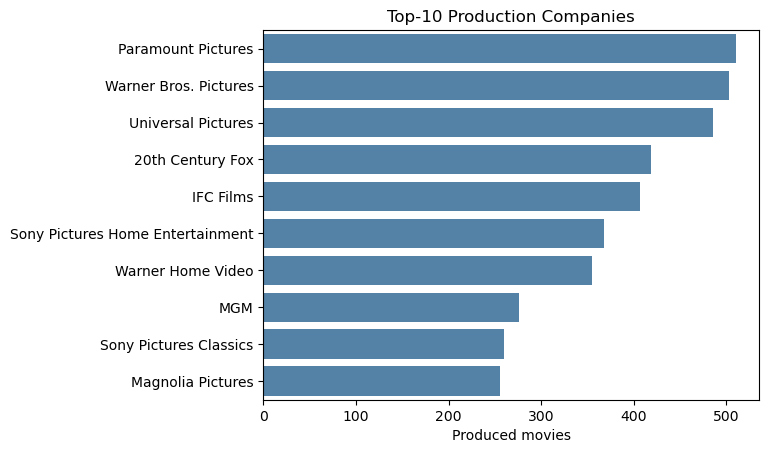

In [18]:
### Top-10 Production Companies: understand which studios produce the most movies

pd.options.mode.chained_assignment = None # solution to error "A value is trying to be set on a copy of a slice from a DataFrame". 
movies01 = movies[movies.original_release_date.notnull()] # only keep movies with release year
movies01.original_release_date = pd.to_datetime(movies01.original_release_date)
movies01['year'] = movies01['original_release_date'].apply(lambda x: x.year) # in this way we only have the year

# Filter the df for the plot
count_of_PC = movies01.production_company.value_counts()[:10] #We only want the top 10 for this graph

# Create the plot
sns.barplot(x = count_of_PC.values, y = count_of_PC.index, color = 'steelblue')
plt.title('Top-10 Production Companies')
plt.xlabel('Produced movies')
#plt.savefig('ProductionCo.png', bbox_inches = "tight")

Text(0.5, 0, 'Total reviews')

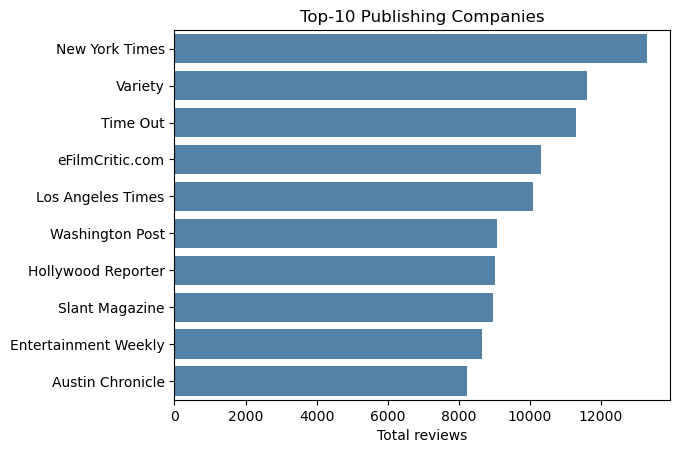

In [19]:
### Top-10 Publisher Names: which magazines, aganecys review the most movies. 

# Filter the df for the plot
count_of_PN = reviews['publisher_name'].value_counts()[:10]

# Create the plot
sns.barplot(x = count_of_PN.values, y = count_of_PN.index, color = 'steelblue' )
plt.title("Top-10 Publishing Companies")
plt.xlabel("Total reviews")
#plt.savefig('publishers.png',bbox_inches = "tight")

In [20]:
# Prepare the final dataframe for the Word Clouds
movies['genre'] = movies['genres'].str.split(',')

# Add columns from movies to reviews table so we will have the genre and and the movie title in columns and can be used as inputs
reviews.insert(1, 'genres', reviews['rotten_tomatoes_link'].map(movies.set_index('rotten_tomatoes_link')['genres']))
reviews.insert(1, 'movie_title', reviews['rotten_tomatoes_link'].map(movies.set_index('rotten_tomatoes_link')['movie_title']))

#we don't need the score for the WC
reviews.drop(['review_score'], axis = 1, inplace = True)
reviews.head(2)

,rotten_tomatoes_link,movie_title,genres,critic_name,top_critic,publisher_name,review_type,review_date,review_content
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Action & Adventure, Comedy, Drama, Science Fic...",Andrew L. Urban,False,Urban Cinefile,Fresh,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Action & Adventure, Comedy, Drama, Science Fic...",Louise Keller,False,Urban Cinefile,Fresh,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."


In [23]:
### Save reviews_wc to pickle
# reviews_wc = reviews
# reviews_wc.to_pickle("pickles/review_final-wc_p.pkl")
# reviews_wc = pd.read_pickle("pickles/review_final-wc_p.pkl")
# reviews_wc.head(2)

,rotten_tomatoes_link,movie_title,genres,critic_name,top_critic,publisher_name,review_type,review_date,review_content
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Action & Adventure, Comedy, Drama, Science Fic...",Andrew L. Urban,False,Urban Cinefile,Fresh,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Action & Adventure, Comedy, Drama, Science Fic...",Louise Keller,False,Urban Cinefile,Fresh,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."


In [25]:
### Run
reviews_wc = pd.read_pickle("pickles/review_final-wc_p.pkl")
reviews_wc.head(2)

,rotten_tomatoes_link,movie_title,genres,critic_name,top_critic,publisher_name,review_type,review_date,review_content
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Action & Adventure, Comedy, Drama, Science Fic...",Andrew L. Urban,False,Urban Cinefile,Fresh,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Action & Adventure, Comedy, Drama, Science Fic...",Louise Keller,False,Urban Cinefile,Fresh,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."


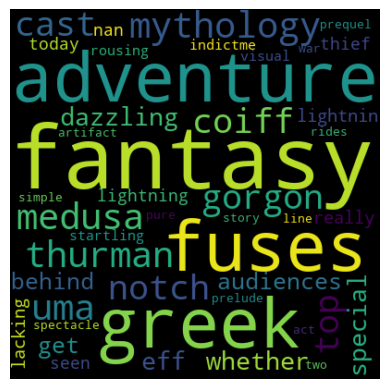

In [14]:
### Word Cloud for Genre with str contains
select_genre = str(input('Type :'))
text03 = reviews_wc[reviews_wc['genres'].str.contains(select_genre, na=False)]['review_content'] #'''Hola, como estas 19845''' groupby(['first_genre']
text03 = str(text03)
text03 = re.sub(r"\d+","",text03)
tokenizer = nltk.RegexpTokenizer(r"\w+")
nopunc = tokenizer.tokenize(text03)
words03=" ".join(nopunc)
words03= nltk.word_tokenize(words03.lower())
x3 = re.findall("[0-9]+",text03)
stop_words = set(stopwords.words('english'))
stop_words |= set(x3) #add the list with all the numbers in the string to the list of stopwords
stop_words.update({'n', 'name', 'review_content','length', 'dtype', 'object','movie','film','films','th','one','like','sharknado','b',select_genre.lower()})
words = words03

sentence04 = [w for w in words if not w in stop_words]

wordcloud = WordCloud(width=400, height=400, max_font_size=200, min_font_size=10)

sentence1 = sentence04
freq = nltk.FreqDist(sentence1)

wordcloud.generate_from_frequencies(freq)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

### To save uncommment
# wordcloud.to_file('N.png')
# plt.savefig('WC-Shawshank.png')

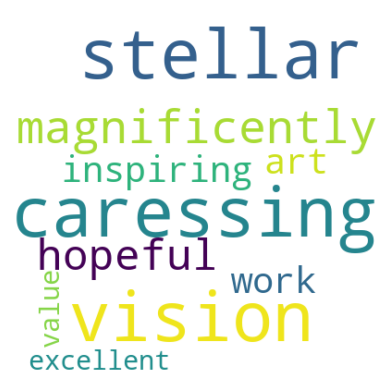

In [65]:
### Word Cloud for Movies
select_genre = str(input('Type :'))
text03 = reviews_wc[reviews_wc['movie_title'].str.contains(select_genre, na=False)]['review_content'] #'''Hola, como estas 19845''' groupby(['first_genre']
text03 = str(text03)
text03 = re.sub(r"\d+","",text03)
tokenizer = nltk.RegexpTokenizer(r"\w+")
nopunc = tokenizer.tokenize(text03)
words03=" ".join(nopunc)
words03= nltk.word_tokenize(words03.lower())
x3 = re.findall("[0-9]+",text03)
stop_words = set(stopwords.words('english'))
stop_words |= set(x3) #add the list with all the numbers in the string to the list of stopwords
stop_words.update({'n', 'name', 'review_content','length', 'dtype', 'object','movie','film','films','th','one','like','sharknado','b','j','pauses','rapt',
                   'challen','sustain','able','gift','du','creates','teaches','throughout','production',select_genre.lower()})
words = words03

sentence04 = [w for w in words if not w in stop_words]

wordcloud = WordCloud(width=400, height=400,max_words = 10,background_color='white', max_font_size=200, min_font_size=10)

sentence1 = sentence04
freq = nltk.FreqDist(sentence1)

wordcloud.generate_from_frequencies(freq)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

#To save uncomment
# wordcloud.to_file('N.png')
# plt.savefig('WC-Shawshank.png')